### R using odin

*Author*: Simon Frost

*Date*: 2018-07-12

In [1]:
library(odin)
library(reshape2)

In [2]:
sir_ode <- odin::odin({
  ## Derivatives
  deriv(S) <- -b*S*I
  deriv(I) <- b*S*I-g*I
  deriv(R) <- g*I

  ## Initial conditions
  initial(S) <- 0.99
  initial(I) <- 0.01
  initial(R) <- 0.00

  ## parameters
  b <- 0.1
  g <- 0.05
  config(base) <- "sir"
}, ".")

Compiling shared library


gcc -I/usr/local/lib/R/include -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c sir.c -o sir.o
g++ -shared -L/usr/local/lib/R/lib -L/usr/local/lib -o sir_d68bb0b5.so sir.o -L/usr/local/lib/R/lib -lR


In [3]:
sir_mod <- sir_ode()
times <- seq(0,200,length.out=2001)
sir_out <- sir_mod$run(times)

In [4]:
sir_out_long <- melt(as.data.frame(sir_out),"t")

#### Visualisation

In [5]:
library(ggplot2)

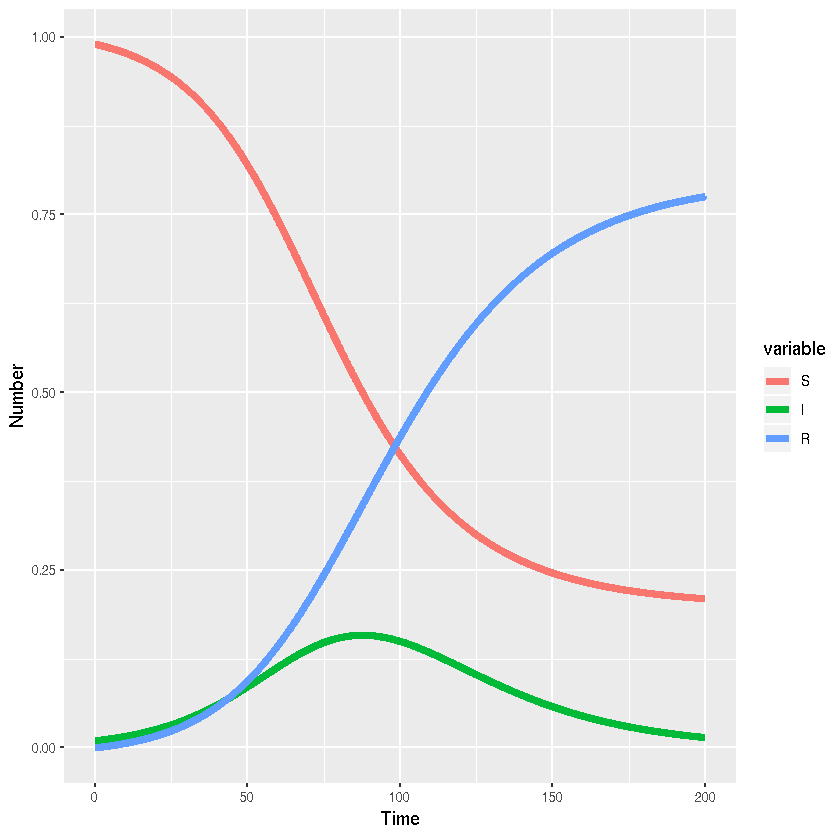

In [6]:
ggplot(sir_out_long,aes(x=t,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")